In [ ]:

#Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.metrics import integrated_brier_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the dataset
df = pd.read_excel(r"C:/Users/DELL/Downloads/data_final.xlsx")

#checking for first five columns
df.head()

,Systolicbloodpressure,Diastolicbloodpressure,Bodyweight,Whitebloodcellcount,Hemoglobinlevel,Platelets,Serumcreatininelevel,BloodUreaNitrogenlevel,Glucoselevel,Potassiumlevel,...,PosttransplantGastrointestin,Anepisodeofhyperacuterejection,Posttransplantglomerulonephrit,Posttransplantdelayedgraftfunc,Posttransplantfluidoverloa,PosttransplantCovid19,marital_statuss,postwaterintakee,Graftsurvivaltime,Graftsurvivalcensoringindicat
0,180,110,79.0,1.0,6.8,45,1.0,33.43,99,4.8,...,0,0,0,1,1,0,1,2,323,0
1,170,110,69.5,1.0,4.0,120,1.5,35.29,69,4.5,...,1,0,0,0,0,0,1,3,378,0
2,180,108,43.0,3.9,4.0,56,1.2,41.37,87,5.5,...,0,0,0,1,0,0,1,1,672,0
3,180,110,51.4,5.5,4.4,120,0.9,37.81,69,5.5,...,0,1,1,1,0,0,0,1,522,0
4,180,110,75.9,1.0,4.0,46,0.7,25.00,69,5.4,...,0,1,0,1,0,0,1,1,89,0


In [ ]:
#statistical summary of the dataset

df.describe()

,Systolicbloodpressure,Diastolicbloodpressure,Bodyweight,Whitebloodcellcount,Hemoglobinlevel,Platelets,Serumcreatininelevel,BloodUreaNitrogenlevel,Glucoselevel,Potassiumlevel,...,PosttransplantGastrointestin,Anepisodeofhyperacuterejection,Posttransplantglomerulonephrit,Posttransplantdelayedgraftfunc,Posttransplantfluidoverloa,PosttransplantCovid19,marital_statuss,postwaterintakee,Graftsurvivaltime,Graftsurvivalcensoringindicat
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,...,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,157.589928,103.687050,56.760072,3.204065,5.463561,85.715827,0.986871,34.664964,90.996403,5.035108,...,0.431655,0.215827,0.226619,0.471223,0.161871,0.014388,0.438849,1.593525,253.215827,0.075540
std,22.307601,8.410878,14.975707,2.956165,2.130091,54.528651,0.335697,8.444941,29.231492,0.620138,...,0.496200,0.412137,0.419399,0.500071,0.368996,0.119301,0.497141,0.889303,192.612432,0.264737
min,105.000000,70.000000,32.600000,1.000000,4.000000,45.000000,0.700000,19.420000,69.000000,2.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,143.000000,99.000000,43.000000,1.000000,4.000000,45.000000,0.700000,26.060000,69.000000,4.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,82.000000,0.000000
50%,160.500000,108.500000,52.700000,1.800000,4.200000,72.500000,0.900000,33.870000,80.500000,5.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,221.500000,0.000000
75%,180.000000,110.000000,64.875000,4.500000,6.200000,104.750000,1.187500,41.355000,100.500000,5.500000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,381.750000,0.000000
max,180.000000,110.000000,110.000000,12.930000,12.460000,351.000000,2.600000,50.000000,212.000000,5.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,677.000000,1.000000


In [ ]:
#general info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Systolicbloodpressure            278 non-null    int64  
 1   Diastolicbloodpressure           278 non-null    int64  
 2   Bodyweight                       278 non-null    float64
 3   Whitebloodcellcount              278 non-null    float64
 4   Hemoglobinlevel                  278 non-null    float64
 5   Platelets                        278 non-null    int64  
 6   Serumcreatininelevel             278 non-null    float64
 7   BloodUreaNitrogenlevel           278 non-null    float64
 8   Glucoselevel                     278 non-null    int64  
 9   Potassiumlevel                   278 non-null    float64
 10  Sodiumlevel                      278 non-null    int64  
 11  Calciumlevel                     278 non-null    float64
 12  Phosphoruslevel       

In [ ]:
#Checking for null values
df.isnull().sum()

Systolicbloodpressure              0
Diastolicbloodpressure             0
Bodyweight                         0
Whitebloodcellcount                0
Hemoglobinlevel                    0
Platelets                          0
Serumcreatininelevel               0
BloodUreaNitrogenlevel             0
Glucoselevel                       0
Potassiumlevel                     0
Sodiumlevel                        0
Calciumlevel                       0
Phosphoruslevel                    0
Tac_MR                             0
Recipientsage                      0
Donorage                           0
Bodymassindex                      0
Numberofposttransplantadmission    0
Durationsincetransplant            0
eGFR                               0
Recipientssex                      0
RecipientsReligion                 0
Recipientslevelofeducation         0
Recipientsemploymentstatus         0
Recipientsresidence                0
Donorsex                           0
Donortorecipientrelationship       0
P

In [ ]:
#doing auto eda using sweetwiz library

import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:15 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#changing the datatype of a column and assigning the dependent and independent variable.

df['Graftsurvivalcensoringindicat']=df['Graftsurvivalcensoringindicat'].astype(bool)
y = df.loc[:,['Graftsurvivalcensoringindicat', 'Graftsurvivaltime']]
X = df.drop(['Graftsurvivaltime','Graftsurvivalcensoringindicat', 'Anepisodeofhyperacuterejection', 'Bodyweight'], axis=1)
y = y.to_records(index=False)

In [ ]:
#Splitting the dataset into Train and test

random_state = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_state)

 Random Survival Forest
 

In [ ]:
#assigning varibale to model and including hyperparameters, which obtained after hyperparameter tuning
rsf = RandomSurvivalForest(n_estimators=25,
                           min_samples_split=10,
                           max_depth = 3,
                           min_samples_leaf=20,
                           n_jobs=-1,
                           random_state=random_state)

In [ ]:
#Fitting the model to train data
rsf.fit(X_train, y_train)

RandomSurvivalForest(max_depth=3, min_samples_leaf=20, min_samples_split=10,
                     n_estimators=25, n_jobs=-1, random_state=20)

In [ ]:
#Test accuracy (Concordance Index)
rsf_c_index_test = rsf.score(X_test, y_test)
print("Test C-index",rsf_c_index_test)

#Train accuracy
rsf_c_index_train = rsf.score(X_train, y_train)
print("Train C-index",rsf_c_index_train)

Test C-index 0.9939024390243902
Train C-index 0.9677611940298507


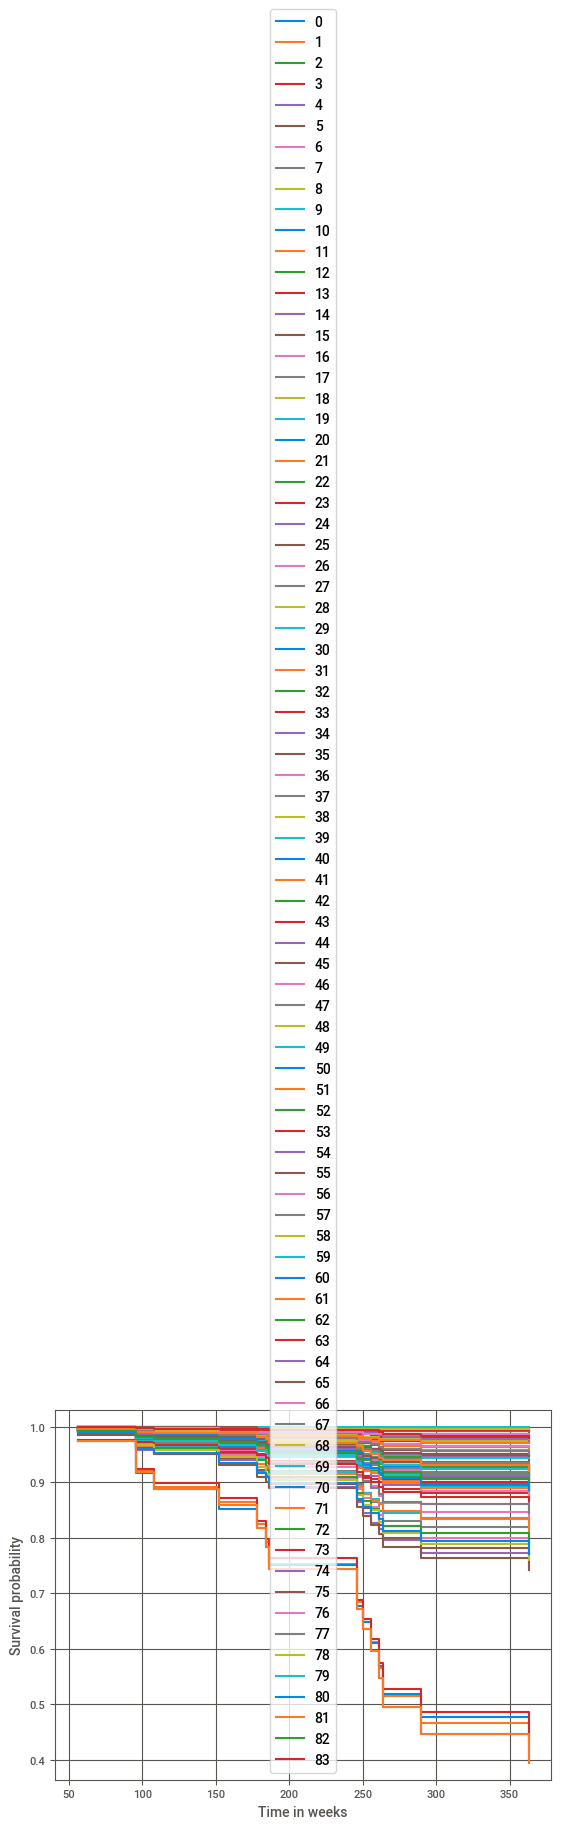

In [ ]:
#Visualizing the survival probability over time for test data
surv_rsf = rsf.predict_survival_function(X_test, return_array=True)

for i, s in enumerate(surv_rsf):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in weeks")
plt.legend()
plt.grid(True)

In [ ]:
#Making coditions for brier score calculation

lower, upper = np.percentile(y["Graftsurvivaltime"], [10, 90])
y_times = np.arange(lower, upper + 1)
print(y_times)

surv_test_rsf = rsf.predict_survival_function(X_test, return_array=False)
# In[10]:
T1, T2 = surv_test_rsf[0].x.min(),surv_test_rsf[0].x.max()
mask = np.logical_or(y_times >= T2, y_times < T1) # keeping the values in defined range
times = y_times[~mask]
 
rsf_surv_prob = np.row_stack([ fn(times) for fn in surv_test_rsf  ])
rsf_surv_prob


[ 32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.
  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.
  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101.
 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115.
 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129.
 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143.
 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157.
 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171.
 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185.
 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199.
 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213.
 214. 215. 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227.
 228. 

array([[1.        , 1.        , 1.        , ..., 0.99244939, 0.99244939,
        0.99244939],
       [0.97469668, 0.97469668, 0.97469668, ..., 0.46655685, 0.46655685,
        0.46655685],
       [1.        , 1.        , 1.        , ..., 0.99301587, 0.99301587,
        0.99301587],
       ...,
       [0.99644269, 0.99644269, 0.99644269, ..., 0.93105301, 0.93105301,
        0.93105301],
       [0.99292857, 0.99292857, 0.99292857, ..., 0.90777638, 0.90777638,
        0.90777638],
       [1.        , 1.        , 1.        , ..., 0.98440316, 0.98440316,
        0.98440316]])

In [ ]:
#calcularing rsf brier score

rsf_brier = integrated_brier_score(y, y_test, rsf_surv_prob, times)

In [ ]:
print(rsf_brier)

0.03352538833950873


Cox proportional hazard

In [ ]:
#assigning varible to standars cox model
cph = CoxPHSurvivalAnalysis(alpha = 10)

In [ ]:
#fitting the standard cox model
cph.fit(X_train, y_train)

CoxPHSurvivalAnalysis(alpha=10)

In [ ]:
#getting c index for standard cox model for test and train data

cph_c_index_test = cph.score(X_test, y_test)
print("Test C-index", cph_c_index_test)
cph_c_index_train = cph.score(X_train, y_train)
print("Train C-index",cph_c_index_train)

Test C-index 0.9796747967479674
Train C-index 0.9982089552238806


In [ ]:
#Unique event of times
event_times_cph = cph.event_times_

In [ ]:
lower_cph, upper_cph = np.percentile(y["Graftsurvivaltime"], [10, 90])
y_times_cph = np.arange(lower_cph, upper_cph + 1)

In [ ]:
surv_test_cph = cph.predict_survival_function(X_test, return_array=False)

In [ ]:
T1, T2 = surv_test_cph[0].x.min(),surv_test_cph[0].x.max()
mask_cph = np.logical_or(y_times_cph >= T2, y_times_cph < T1) #  # keeping the values in defined range
times_cph = y_times_cph[~mask_cph]

In [ ]:
cph_surv_prob_test = np.row_stack([ fn(times_cph) for fn in surv_test_cph])

In [ ]:
#calculating brier score for standard cox

score_brier_cph = pd.Series(
    [
        integrated_brier_score(y, y_test, cph_surv_prob_test, times_cph)
    ],
    index=["Std. Cox"],   
)
print(score_brier_cph)

Std. Cox    0.070891
dtype: float64


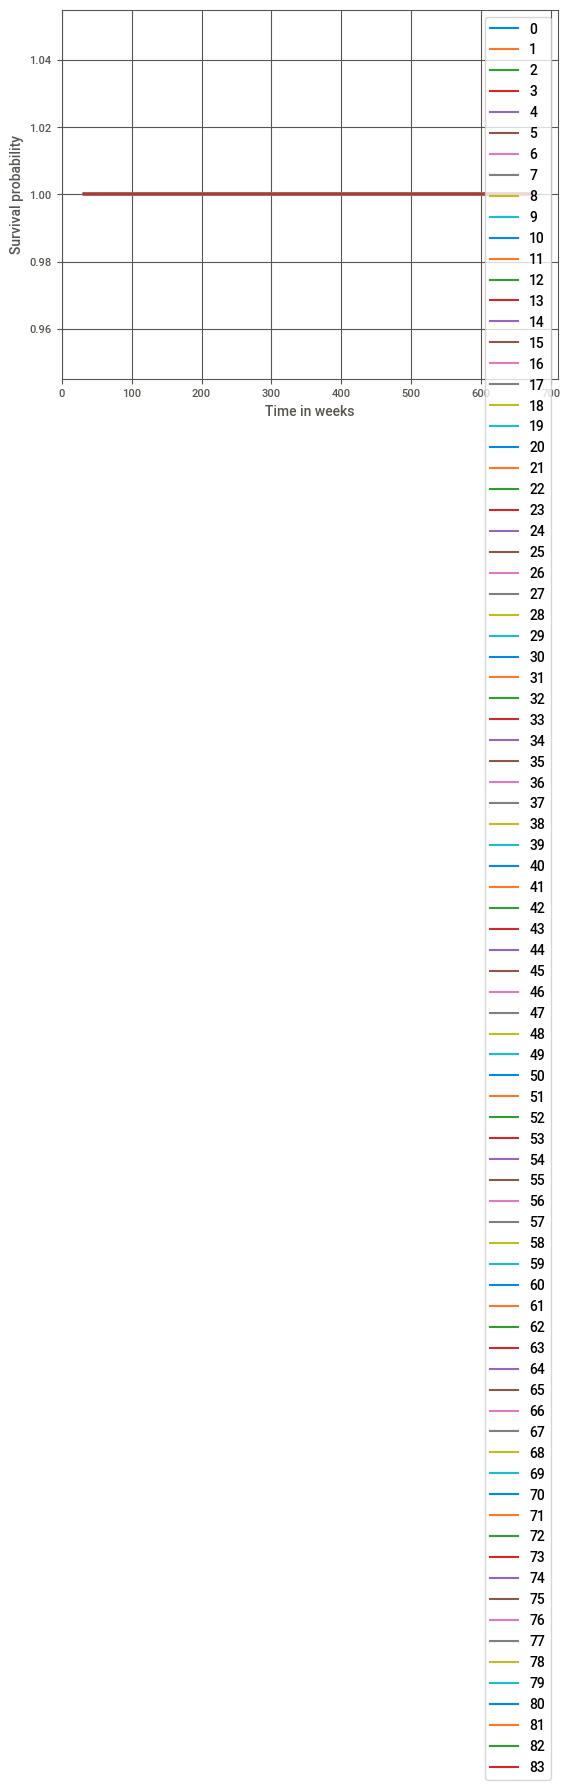

In [ ]:
#Visualizing survival the probability over time for a sample of observation
surv_cph = cph.predict_survival_function(X_test, return_array=True)

for i, s in enumerate(surv_cph):
    plt.step(cph.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in weeks")
plt.legend()
plt.grid(True)

Elastic-Net based Cox

In [ ]:
#Assigning the variable to Elastic net based cox model and fitting the model
cph_e = CoxnetSurvivalAnalysis(l1_ratio= 0.00021, fit_baseline_model = True)
cph_e.fit(X_train,y_train)

CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=0.00021)

In [ ]:
#Calculating c index for Test and train data
cph_e_c_index_test = cph_e.score(X_test, y_test)
print("Test C-index", cph_e_c_index_test)
cph_e_c_index_train = cph_e.score(X_train, y_train)
print("Train C-index", cph_e_c_index_train)

Test C-index 0.975609756097561
Train C-index 0.9617910447761194


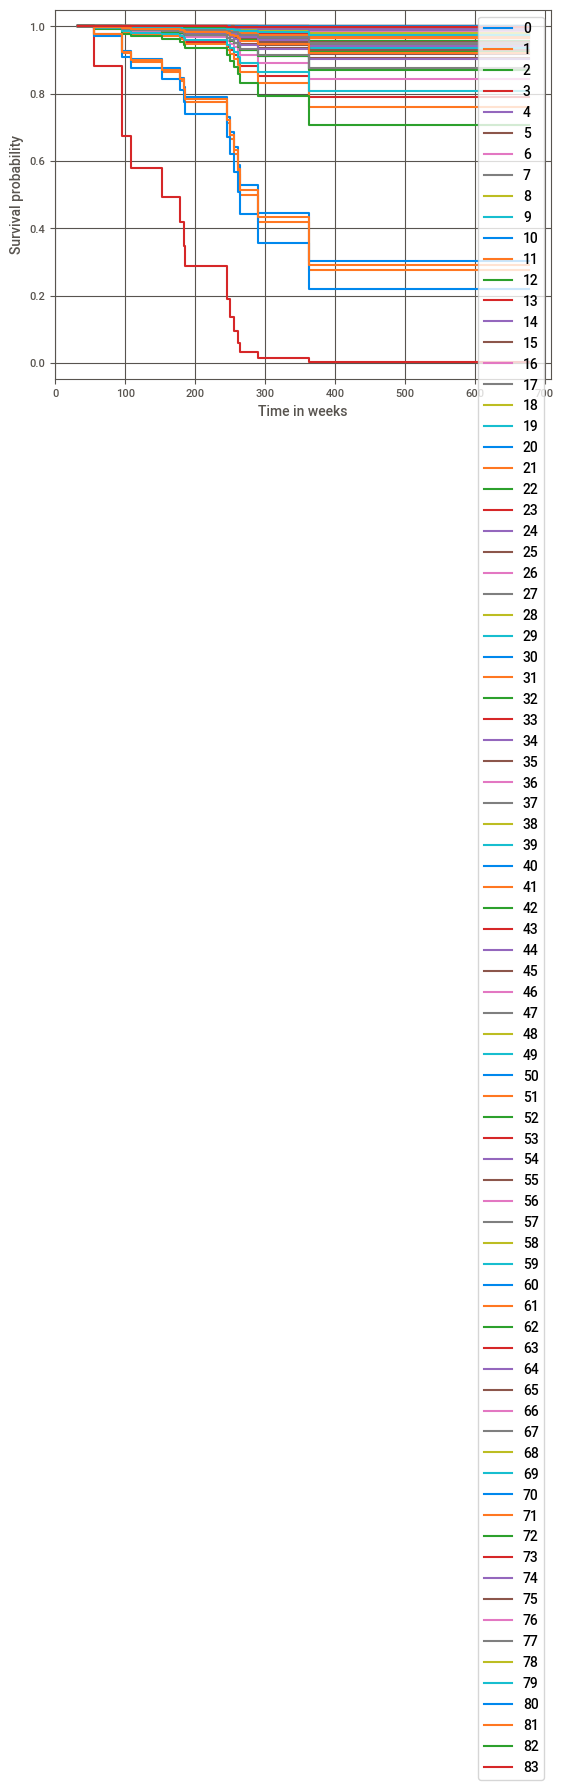

In [ ]:
#Visualizing the survival probability over time for test sample
surv_cph_e = cph_e.predict_survival_function(X_test, return_array=True)

for i, s in enumerate(surv_cph_e):
    plt.step(cph_e.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in weeks")
plt.legend()
plt.grid(True)

In [ ]:
lower_cph_e, upper_cph_e = np.percentile(y["Graftsurvivaltime"], [10, 90])
y_cph_e_times = np.arange(lower_cph_e, upper_cph_e + 1)

In [ ]:
surv_test_cph_e = cph_e.predict_survival_function(X_test, return_array=False)

In [ ]:
T1, T2 = surv_test_cph_e[0].x.min(),surv_test_cph_e[0].x.max()
mask_cph_e = np.logical_or(y_cph_e_times >= T2, y_cph_e_times < T1)  # keeping the values in defined range
times_cph_e = y_cph_e_times[~mask_cph_e]

In [ ]:
cph_e_surv_prob_test = np.row_stack([ fn(times_cph_e) for fn in surv_test_cph_e])

In [ ]:
#Brier score for Elastic net based cox model
score_brier_cph_e = pd.Series(
    [
        integrated_brier_score(y, y_test, cph_e_surv_prob_test, times_cph_e)
    ],
    index=["Elastic net based COX "],
    name="IBS"
)
print(score_brier_cph_e)

Elastic net based COX     0.028029
Name: IBS, dtype: float64


Survival Prediction:

Survival Probability at 6 months: 0    99.483333
Name: 24, dtype: float64
Survival Probability at 1 year: 0    98.366667
Name: 52, dtype: float64
Survival Probability at 2 years: 0    97.933333
Name: 104, dtype: float64
Survival Probability at 5 years: 0    92.56791
Name: 260, dtype: float64


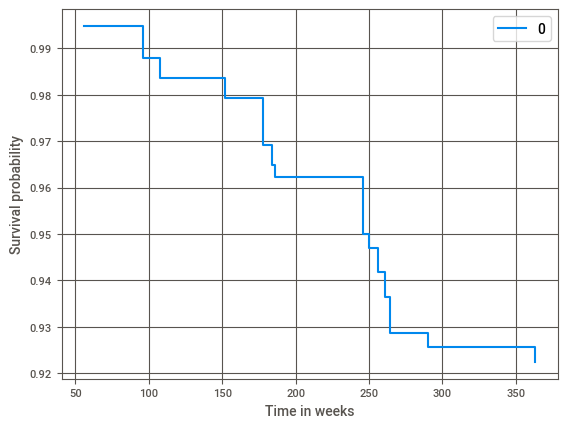

In [ ]:
#taking one instance of the test data for survival prediction

input_data = X_test.iloc[10 , :]
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#Predicting survival for input data
surv_test_rsf = rsf.predict_survival_function(input_data_reshaped, return_array=False)
surv = rsf.predict_survival_function(input_data_reshaped, return_array=True)

#Unique time points where events occured
event_times = rsf.event_times_

#Getting survival probability for all weeks
lower, upper = event_times[0], event_times[-1]
y_times = np.arange(lower, upper)

T1, T2 = surv_test_rsf[0].x.min(),surv_test_rsf[0].x.max()
mask = np.logical_or(y_times >= T2, y_times < T1) #  # keeping the values in defined range
times = y_times[~mask]

rsf_surv_prob_test = np.row_stack([ fn(times) for fn in surv_test_rsf])
rsf_surv_prob_test1 = pd.DataFrame(rsf_surv_prob_test)
print('Survival Probability at 6 months:',(rsf_surv_prob_test1.iloc[ :,24])*100)
print('Survival Probability at 1 year:',(rsf_surv_prob_test1.iloc[ :,52])*100)
print('Survival Probability at 2 years:',(rsf_surv_prob_test1.iloc[ :,104])*100)
print('Survival Probability at 5 years:',(rsf_surv_prob_test1.iloc[ :,260])*100)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in weeks")
plt.legend()
plt.grid(True)

In [ ]:
#Saving the trained model
import pickle

filename = 'rsf_model_final'
pickle.dump(rsf, open(filename, 'wb')) #wb = writing binary